# Two states and multiplicity

This notebook uses the code in "two_states_discrete_time.jl" to run several numerical simulations of a version of the Eaton-Gersovitz model in discrete time with two possible realization of the a outside option shock, as well as concave utility (in what follows, log). 

The simulation relies on a primal representation of equilibrium.

In [1]:
include("two_states_long_bond.jl");

In [2]:
m = TwoStatesModel()

R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.25 y=1.0 points=10001

In [3]:
bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m);

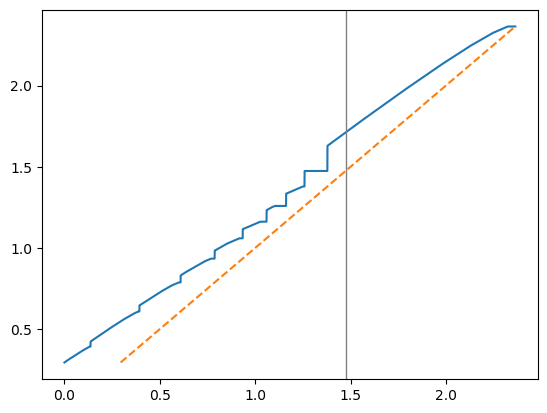

In [4]:
plot_pol(bor);

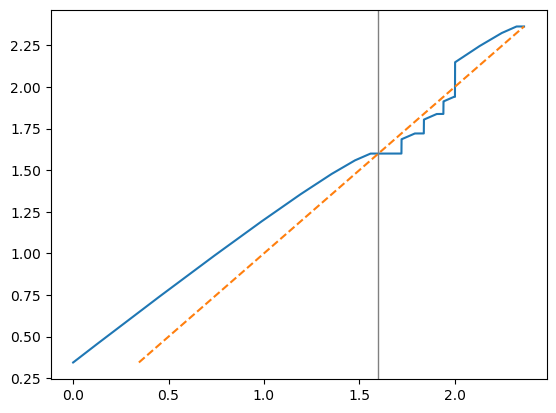

In [5]:
plot_pol(sav);

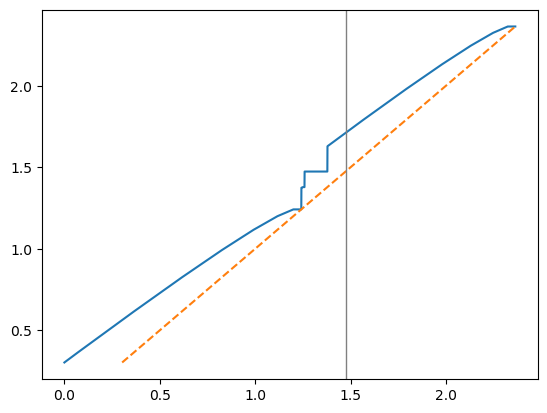

In [6]:
plot_pol(hyb);

## Checking the accuracy of the constructions

In [7]:
a_tmp = Alloc(m);

In [8]:
for x in [bor, sav, hyb]
    iterate_v_and_pol!(a_tmp, x)
    println(maximum(abs.(a_tmp.v .- x.v)))
end

2.220446049250313e-16
2.220446049250313e-16
2.6150369531019457e-5


The savings and the borrowing are indeed equilibrium. 
The hybrid does not seem to be an equilibrium in discrete time for this parameterization. 

## Iterating backwards

Iter 10. Distance=0.9010179849661519
Iter 20. Distance=0.9410852351273012
Iter 30. Distance=0.929634008586049
Iter 40. Distance=0.9233698650294618
Iter 50. Distance=0.9203683040455536
Iter 60. Distance=0.9189419090406775
Iter 70. Distance=0.9182628641558037
Iter 80. Distance=0.9179378740661646
Iter 90. Distance=0.9177869721692055
Iter 100. Distance=0.02542606252498303
Iter 110. Distance=0.025264300932319905
Iter 120. Distance=0.01953812070126071
Iter 130. Distance=0.025093242383731784
Iter 140. Distance=0.025056314642197486
Iter 150. Distance=3.4665474723527545e-5
Iter 160. Distance=0.019374416451885534
Iter 170. Distance=1.4052288841659433e-5
Iter 180. Distance=5.472187771693449e-6
Iter 190. Distance=2.1309581198503125e-6
Iter 200. Distance=0.012163472106624162
Iter 210. Distance=4.01102538410969e-6
Iter 220. Distance=1.5619579351033863e-6
Iter 230. Distance=6.082515959793255e-7
Iter 240. Distance=2.3686297556668734e-7
Iter 250. Distance=9.223826069604257e-8
Iter 260. Distance=3.59190

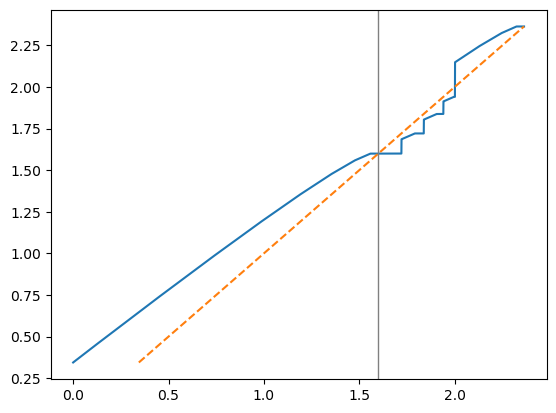

370. Distance=1.12207465541303e-12
Converged.


In [9]:
iter_out = iterate_backwards(m)
plot_pol(iter_out);

In this case we have converged to the savings equilibrium.

## Another parameter specification

In [10]:
m = TwoStatesModel(R=1.05, β=0.92, δ=0.10, npoints_approx=20000)

R=1.05 β=0.92 τH=0.15 τL=0.08 λ=0.025 δ=0.1 y=1.0 points=20001

In [11]:
bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m);

In [12]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.7188905394022551
Iter 20. Distance=0.8254565602620448
Iter 30. Distance=0.8506699877924698
Iter 40. Distance=0.8514445259203092
Iter 50. Distance=0.8499299974643371
Iter 60. Distance=0.8488926755481255
Iter 70. Distance=0.8483451083735261
Iter 80. Distance=0.848075741524153
Iter 90. Distance=0.08942684264729162
Iter 100. Distance=0.07457457735176354
Iter 110. Distance=0.07443563715799995
Iter 120. Distance=0.07435554334971928
Iter 130. Distance=0.07430857329420693
Iter 140. Distance=0.0742983523568399
Iter 150. Distance=0.07423094908601868
Iter 160. Distance=0.07424428670539707
Iter 170. Distance=0.0742369909310191
Iter 180. Distance=5.718109168606489e-6
Iter 190. Distance=0.014603794536565129
Iter 200. Distance=2.147450944567364e-6
Iter 210. Distance=9.328278983145033e-7
Iter 220. Distance=4.052096696516294e-7
Iter 230. Distance=1.7601840229808374e-7
Iter 240. Distance=7.64603617642301e-8
Iter 250. Distance=3.321349861806766e-8
Iter 260. Distance=1.442756059066852e

Alloc for model: R=1.05 β=0.92 τH=0.15 τL=0.08 λ=0.025 δ=0.1 y=1.0 points=20001

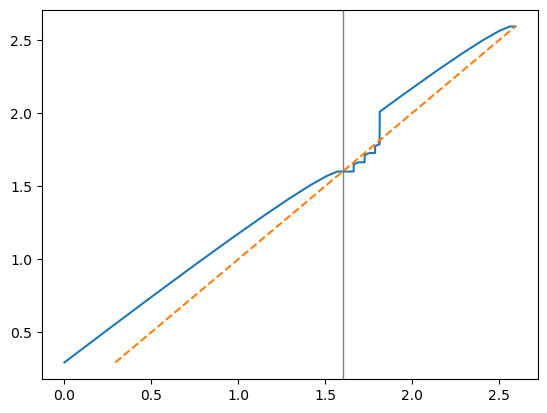

In [13]:
plot_pol(iter_out);

## A note on the hybrid

In [14]:
m = TwoStatesModel(β=exp(-0.1), R=exp(.06))

bor = create_bor_eqm(m)
sav = create_sav_eqm(m)
hyb = create_hyb_eqm(m)

a_tmp = Alloc(m)

for x in [bor, sav, hyb]
    iterate_v_and_pol!(a_tmp, x)
    println(maximum(abs.(a_tmp.v .- x.v)))
end

2.220446049250313e-16
2.220446049250313e-16
2.220446049250313e-16


For this parameterization, the hybrid seems to be an equilibrium. 

## Only Borrowing 

In [15]:
m = TwoStatesModel(δ = 0.05)

R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.05 y=1.0 points=10001

In [16]:
bor = create_bor_eqm(m)

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.05 y=1.0 points=10001

In [17]:
sav = create_sav_eqm(m)

AssertionError: AssertionError: crisis_borrowing.alloc.v[bS_low_loc] <= vH

No savings equilibrium in this case

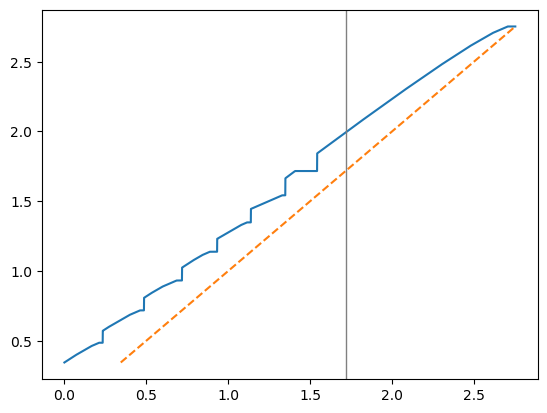

In [18]:
plot_pol(bor);

In [19]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.11034509631709433
Iter 20. Distance=0.7133846439036589
Iter 30. Distance=0.7709612210767033
Iter 40. Distance=0.7854403566635458
Iter 50. Distance=0.7883303409676565
Iter 60. Distance=0.7885507735204019
Iter 70. Distance=0.7883293618878485
Iter 80. Distance=0.7881311766387402
Iter 90. Distance=0.020312050369326484
Iter 100. Distance=0.015029098103021998
Iter 110. Distance=0.7879062697166926
Iter 120. Distance=0.010067383123863821
Iter 130. Distance=9.495765986855531e-6
Iter 140. Distance=0.011123749558848928
Iter 150. Distance=1.0404147313125556e-6
Iter 160. Distance=3.1500990166355436e-7
Iter 170. Distance=9.536831679923807e-8
Iter 180. Distance=2.887011057994826e-8
Iter 190. Distance=8.73895100728106e-9
Iter 200. Distance=2.6450787671272735e-9
Iter 210. Distance=8.005499596563936e-10
Iter 220. Distance=2.4227625461392677e-10
Iter 230. Distance=7.331768525631333e-11
Iter 240. Distance=2.2185586701084503e-11
Iter 250. Distance=6.713518629908322e-12
Iter 260. Distanc

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.05 y=1.0 points=10001

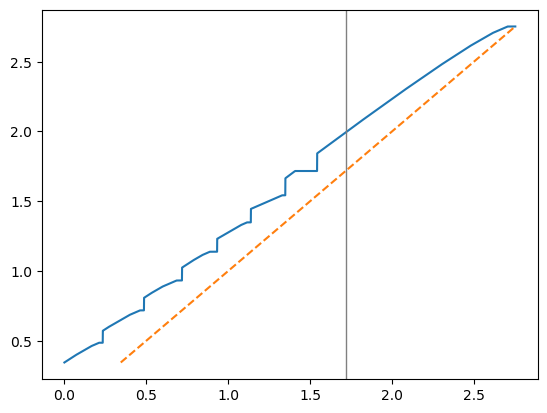

In [20]:
plot_pol(iter_out);

## Only saving

In [21]:
m = TwoStatesModel(δ = 0.4)

R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.4 y=1.0 points=10001

In [22]:
sav = create_sav_eqm(m)

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.4 y=1.0 points=10001

In [23]:
bor = create_bor_eqm(m)

AssertionError: AssertionError: bor_eqm.valid_until == 1

In [24]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.9876108076939502
Iter 20. Distance=0.9688301846913887
Iter 30. Distance=0.955535308763793
Iter 40. Distance=0.9492477998423364
Iter 50. Distance=0.9462592128425412
Iter 60. Distance=0.9448397187943605
Iter 70. Distance=0.9441678564166195
Iter 80. Distance=0.9438459280658781
Iter 90. Distance=0.9436836312022735
Iter 100. Distance=0.02542420108344723
Iter 110. Distance=0.02525872280036945
Iter 120. Distance=0.025156666178336895
Iter 130. Distance=0.025095575183952223
Iter 140. Distance=0.025056673817344
Iter 150. Distance=0.0043468571404085
Iter 160. Distance=1.9164925435855018e-5
Iter 170. Distance=1.3778965179844782e-5
Iter 180. Distance=0.004331903667630699
Iter 190. Distance=2.0895099769324688e-6
Iter 200. Distance=6.0438966180687e-6
Iter 210. Distance=2.353590759590629e-6
Iter 220. Distance=0.005439325658002314
Iter 230. Distance=3.5691006639027023e-7
Iter 240. Distance=1.3898653278276996e-7
Iter 250. Distance=5.412359638246045e-8
Iter 260. Distance=2.10766010200

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.4 y=1.0 points=10001

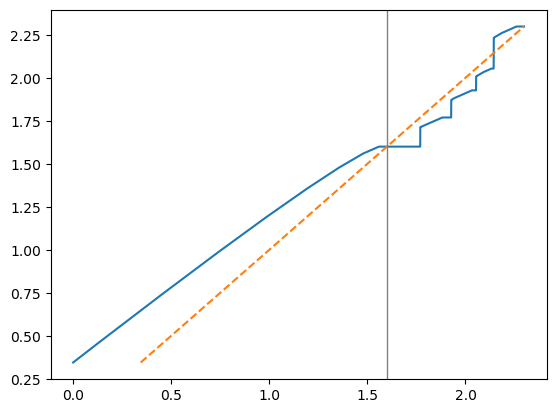

In [25]:
plot_pol(iter_out);

## But sometimes iteration converges to the borrowing eqm

Let's increase the maturity -- but still keep the savings equilibrium.

In [26]:
m = TwoStatesModel(δ = 0.15)

R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.15 y=1.0 points=10001

In [27]:
sav = create_sav_eqm(m)

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.15 y=1.0 points=10001

In [28]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.7742414540393177
Iter 20. Distance=0.8897494549354081
Iter 30. Distance=0.8917655451835694
Iter 40. Distance=0.8869190168129727
Iter 50. Distance=0.8840704500000645
Iter 60. Distance=0.8826477784535244
Iter 70. Distance=0.8819713163679502
Iter 80. Distance=0.8816461058169568
Iter 90. Distance=0.8814956545891218
Iter 100. Distance=0.02265007445869871
Iter 110. Distance=0.007924462095842244
Iter 120. Distance=0.004232003097927983
Iter 130. Distance=8.430924612445878e-6
Iter 140. Distance=0.005209418307864158
Iter 150. Distance=9.435359290543843e-7
Iter 160. Distance=2.8524531692220023e-7
Iter 170. Distance=8.623401437368727e-8
Iter 180. Distance=2.60698591603159e-8
Iter 190. Distance=7.88131654383406e-9
Iter 200. Distance=2.3826422501649347e-9
Iter 210. Distance=7.203092566854252e-10
Iter 220. Distance=2.1776064285106145e-10
Iter 230. Distance=6.583256162429052e-11
Iter 240. Distance=1.9902246517489175e-11
Iter 250. Distance=6.016853681956036e-12
Iter 260. Distance=1.

Alloc for model: R=1.05 β=0.91 τH=0.15 τL=0.08 λ=0.025 δ=0.15 y=1.0 points=10001

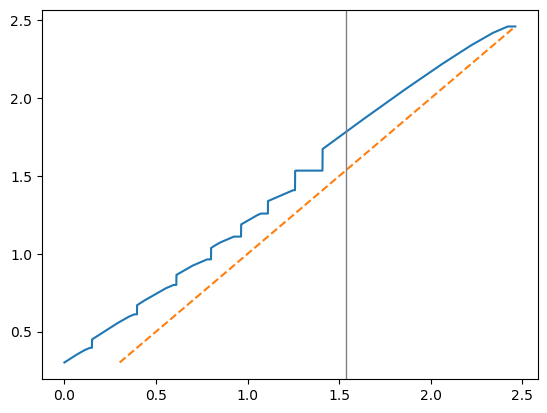

In [29]:
plot_pol(iter_out);

but savings is indeed an equilibrium .. 

In [30]:
a_tmp = Alloc(m);
iterate_v_and_pol!(a_tmp, iter_out);
println("Error in allocation:", maximum(abs.(a_tmp.v .- iter_out.v)))

Error in allocation:7.872591467616985e-13


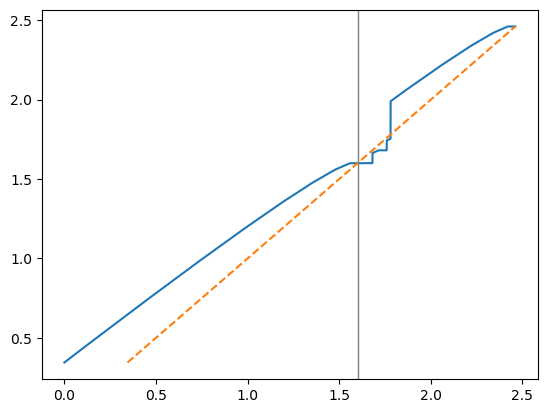

In [31]:
plot_pol(sav);

## Converging to the hybrid when the hybrid is the only one

In [32]:
m = TwoStatesModel(δ = 0.012, λ = 0.05, β=0.93)
bor = create_bor_eqm(m)

AssertionError: AssertionError: bor_eqm.valid_until == 1

In [33]:
sav = create_sav_eqm(m)

AssertionError: AssertionError: crisis_borrowing.alloc.v[bS_low_loc] <= vH

neither the saving nor the borrowing allocations are equilibrium

In [34]:
iter_out = iterate_backwards(m)

Iter 10. Distance=0.12911985758541217
Iter 20. Distance=0.06006644779185749
Iter 30. Distance=0.18032767105478886
Iter 40. Distance=0.3377497627702888
Iter 50. Distance=0.39387320971524176
Iter 60. Distance=0.4159425819095246
Iter 70. Distance=0.4284278797763431
Iter 80. Distance=0.43530682516099106
Iter 90. Distance=0.43906158740412116
Iter 100. Distance=0.4409924991455364
Iter 110. Distance=0.4420664426233022
Iter 120. Distance=0.442768946555296
Iter 130. Distance=8.88688094030643e-5
Iter 140. Distance=6.221206990852934e-5
Iter 150. Distance=4.402006691595073e-5
Iter 160. Distance=2.756724882879702e-5
Iter 170. Distance=1.8870233126633273e-5
Iter 180. Distance=1.5177744349892386e-5
Iter 190. Distance=7.290007493554462e-6
Iter 200. Distance=8.815023981312287e-6
Iter 210. Distance=4.24981991076212e-6
Iter 220. Distance=2.0478623645736604e-6
Iter 230. Distance=9.86245727530033e-7
Iter 240. Distance=4.746684251211164e-7
Iter 250. Distance=2.2828542245445504e-7
Iter 260. Distance=1.096995

Alloc for model: R=1.05 β=0.93 τH=0.15 τL=0.08 λ=0.05 δ=0.012 y=1.0 points=10001

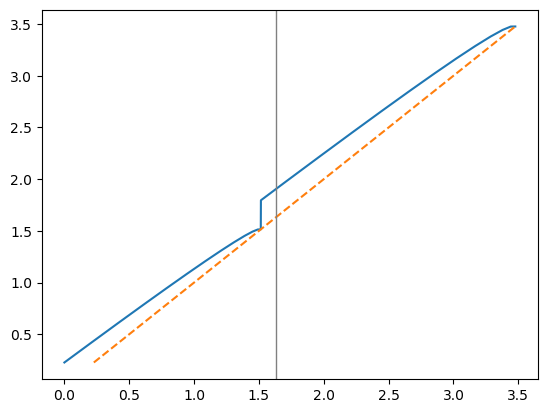

In [35]:
plot_pol(iter_out);

In [36]:
hyb = create_hyb_eqm(m)

Alloc for model: R=1.05 β=0.93 τH=0.15 τL=0.08 λ=0.05 δ=0.012 y=1.0 points=10001

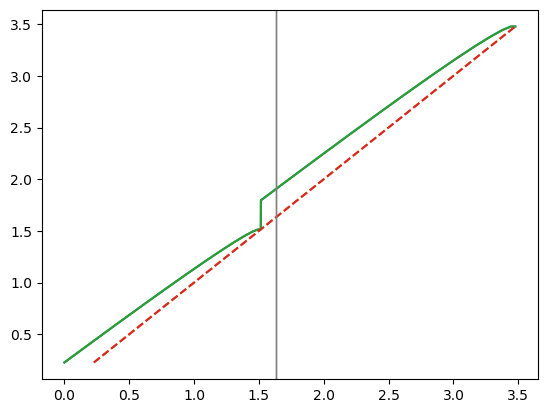

In [37]:
plot_pol(hyb);
plot_pol(iter_out, new_figure=false);

In [38]:
a_tmp = Alloc(m)
iterate_v_and_pol!(a_tmp, hyb)
maximum(abs.(a_tmp.v .- hyb.v))

4.440892098500626e-16